In [ ]:
pip install seaborn pandas matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

exp_json = "./experiment-20260218.json"

methods = ["bruteforce", "dfs", "hillclimb", "buildingwalk"]

df = pd.read_json(exp_json)
df.to_pickle("experiment.pickle")
df.to_csv("experiment-20260218.csv")
#print("Experiment:")
#print(df)

In [2]:
#df[(df["dist_weight"] == 0.0) and (df["radius"] == 50)]
df[(df["dist_weight"] == 1.0) & (df["radius"] == 50) & (df["method"] == "buildingwalk")].best_score.mean()

np.float64(1.720644744130573)

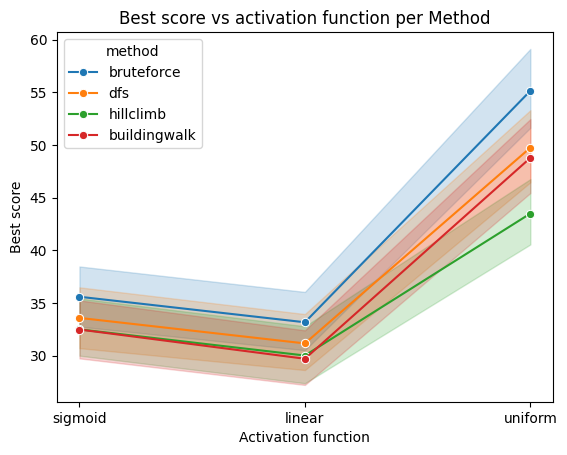

In [2]:
plt.figure()

sns.lineplot(
    data=df,
    x="activation_function",
    y="best_score",
    hue="method",
    hue_order=methods,
    marker="o"
)

plt.xlabel("Activation function")
plt.ylabel("Best score")
plt.title("Best score vs activation function per Method")
plt.show()

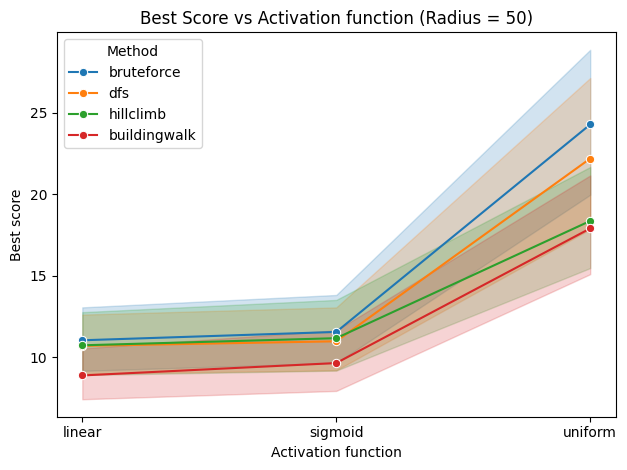

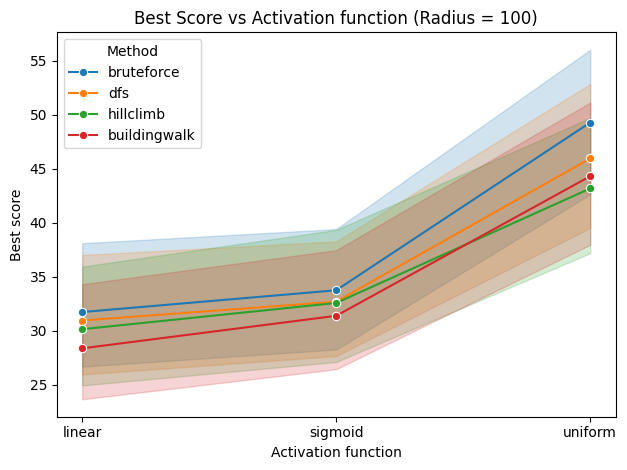

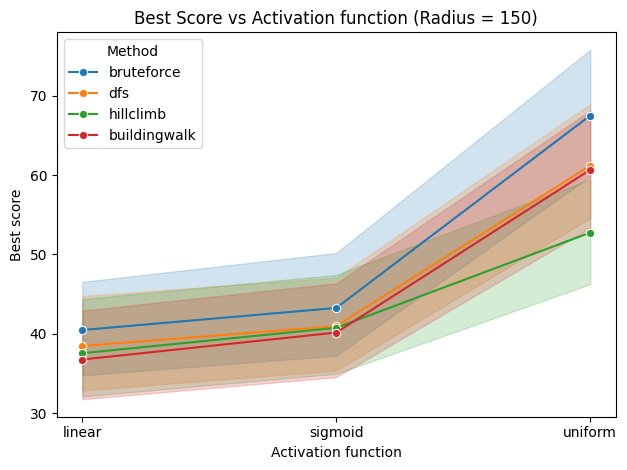

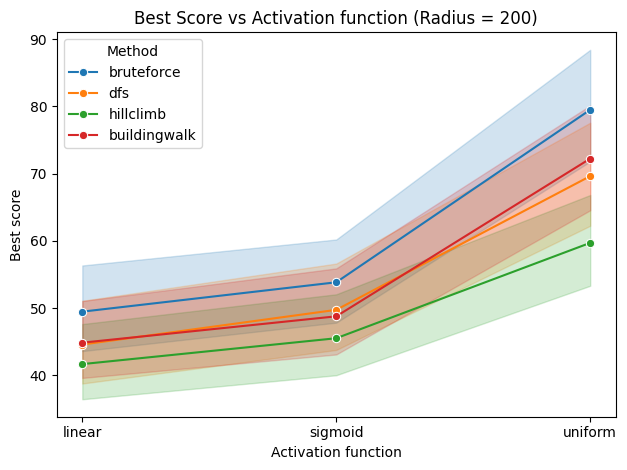

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

radii = sorted(df["radius"].unique())

for r in radii:
    plt.figure()
    
    subset = df[df["radius"] == r].sort_values(["method", "activation_function"])
    
    sns.lineplot(
        data=subset,
        x="activation_function",
        y="best_score",
        hue="method",
        hue_order=methods,
        marker="o",
        #errorbar=None  
    )

    plt.xlabel("Activation function")
    plt.ylabel("Best score")
    plt.title(f"Best Score vs Activation function (Radius = {r})")
    plt.legend(title="Method")
    plt.tight_layout()
    plt.show()


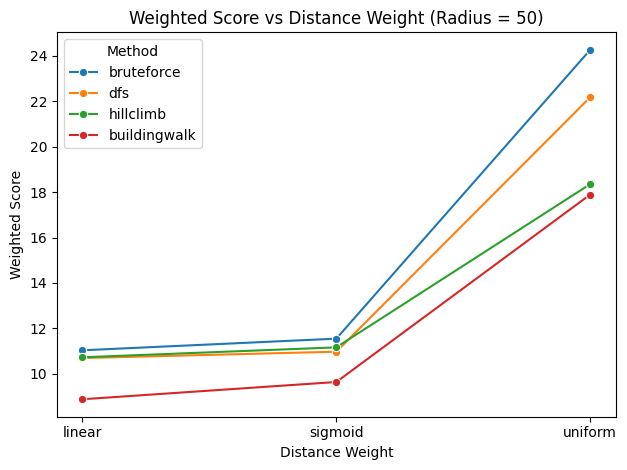

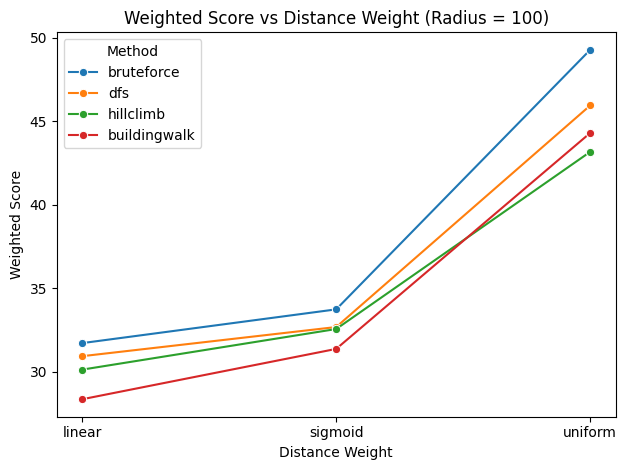

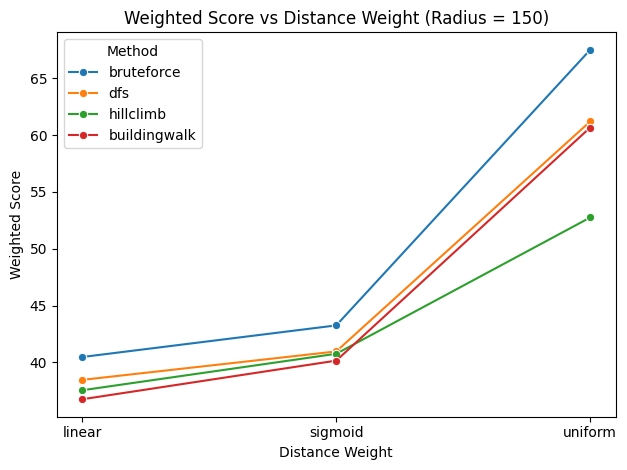

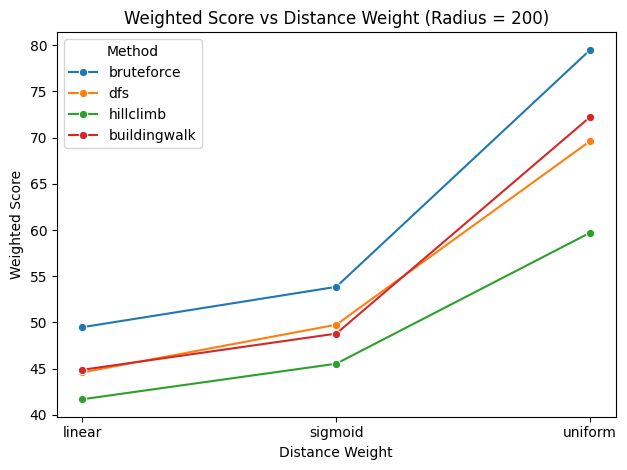

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import os 

radii = sorted(df["radius"].unique())

for r in radii:
    plt.figure()
    
    subset = df[df["radius"] == r].sort_values(["method", "activation_function"])
    
    sns.lineplot(
        data=subset,
        x="activation_function",
        y="best_score",
        hue="method",
        hue_order=methods,
        marker="o",
        errorbar=None  
    )

    plt.xlabel("Distance Weight")
    plt.ylabel("Weighted Score")
    plt.title(f"Weighted Score vs Distance Weight (Radius = {r})")
    plt.legend(title="Method")
    plt.tight_layout()
    plt.savefig(os.path.join(f"{int(r)}.png"), dpi=600)
    plt.show()


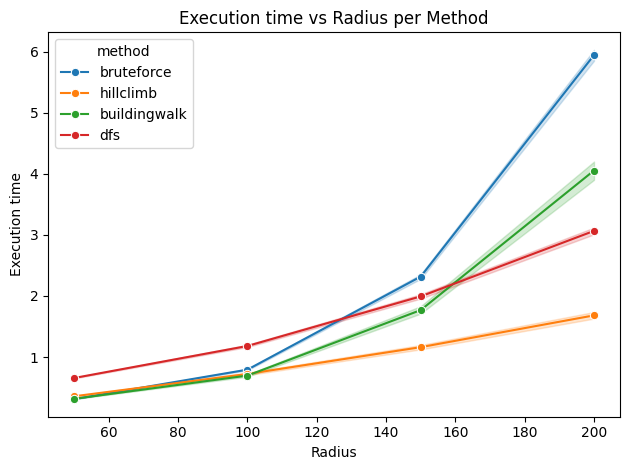

In [5]:
# Check mean steps by radius
plt.figure()

sns.lineplot(
    data=df,
    x="radius",
    y="execution_time",
    hue="method",
    estimator="mean",   
    #errorbar=None,      
    marker="o"
)

plt.xlabel("Radius")
plt.ylabel("Execution time")
plt.title("Execution time vs Radius per Method")
plt.tight_layout()
plt.show()